In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)# A1.2 Polynomial Curve Fitting

## Introduction
The Polynomiacl Curve Fitting is a regression problem, which we will be used as a Study Case in order to introduce the key concepts related to Modelling. The following Study Case is based on the book:

> C. M. Bishop (2006). Pattern Recognition and Machine Learning. 

The Study Case is structured as follows:
1. Problem Description
2. Polynomial Curve Fitting
3. Application

## 1. Problem Description

Consider the data provided in the files:
* `data/data_train.csv`
* `data/data_test.csv`

The data contains two columns `x`y `t`. Suppose we observe have a input variable $x$ and we want to use this observation to predict the value of a target variable $t$. 

For the porpuse of this teaching material the files contains synthetically generated data. The data for this Study Case was generated from the function $sin(2\pi x)$ with random noise in the target values.

The goal is to exploit the data in order to make predictions of the value $\hat{t}$ of the target variable for some new value of the input variable. 

**T1.** Make a plot with the data in `data/data_train.csv` including the curve $sin(2\pi x)$ that was used to generate the data.

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

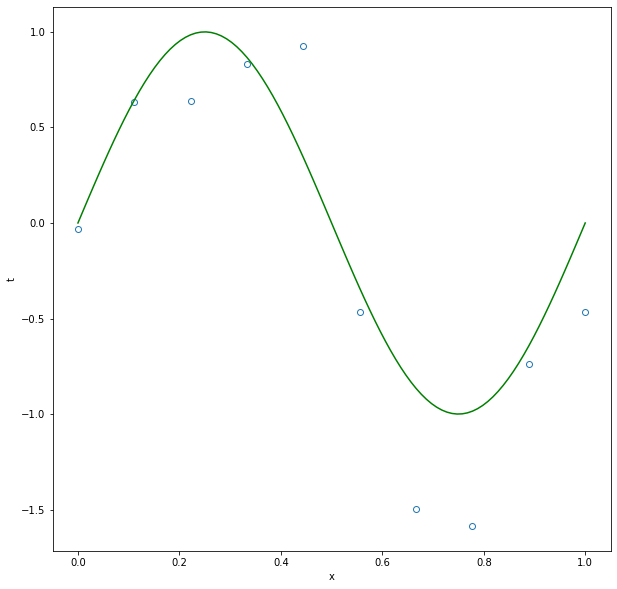

In [3]:
data = pd.read_csv("data/data_train.csv")

x = data['x'].values
y = data['y'].values

xsin = np.linspace(0, 1, 100)
ysin = np.sin(2 * np.pi * xsin)

fig, ax = plt.subplots()
ax.plot(x, y, '.', marker = 'o', markerfacecolor='none')
ax.plot(xsin, ysin, '-', color = 'green')
ax.set(xlabel='x', ylabel='t')

plt.show()

## 2. Polynomial Curve Fitting

In this Study Case, we shall fit the data using a Polynomial Function of the form:

$$ \hat{y}(x,\vec{w}) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + ... + w_M x^M$$

$$ \hat{y}(x,\vec{w}) = \sum_{j=0}^M w_i x^j$$

where $M$ is the order of the polynomial, and $x^j$ denotes $x$ raised to the power of $j$. The polynomials coefficients $w_0$, $w_1$, $\dots$, $w_M$ are collective denotes by the vector $\vec{w}$.

Note that, although the polynomial function $$ \hat{y}(x,\vec{w})$$ is a nonlinear function of $x$, it is a linear function of the coefficients $\vec{w}$. Functions, such as the polynomial, which are linear in the unknown parameters are called *linear models*.

The values of the coefficients will be determined by fitting the polynomial to the training data. The misfit between the function $$ \hat{y}(x,\vec{w})$$ for a given value of $\vec{w}$ (predicted values of $t$) and the training set data points $t$ can be measured with an *error function*. The error function shall be minimized in order to fit the polynomial to the data. 

In this Study Case, the error function will be given by the sum of the squares of the errors between the predictions for each data point and the corresponding target values,

$$ E (\vec{w})= \frac{1}{2} \sum_{n=1}^{N} \{y(x_n, \vec{w})-t_n\}^2 $$

The factor 1/2 is included for later convenience. The curve fitting problem is solved by choosing the value of $\vec{w}$ for which $E(\vec{w})$ is as small as possible. Because the error function is a quadratic function of the coefficients $\vec{w}$, and so the minimization of the error function has a unique solution, denoted by $w^\star$. The resulting polynomial is given by the function $$ \hat{y}(x,\vec{w^\star})$$.

**T2** Create a function `predict(x,w)` which predicts *t* based on the observations of the input variable `x` and the polynomial coefficient `w`. Consider as inputs:
* `x`: a vector including all the values of the input variable x for a given set of point.
* `w`: polynomial coefficient vector.

In [9]:
def predict(x, w):
    """
    Docstring
    
    Input
    x: a vector including all the values of the input variable x for a given set of point, i.e- values for we want to predict the value on 
    the y.axis
    
    w:polynomial coefficient vector. Obtained from function fit
    
    Output:
    List of y-axis points predicted from the x-values, they are in order so the x in index 1 its prediction is also in index one
    of the obtained list
    """
    
    m = len(w)
    
    #This part represents the first summation showed in section 2
    predictions = [sum([w[i] * np.power(j, i) for i in range(m)])[0] for j in x]
    
    return np.array(predictions)

##### NOTE: for this to work first the function fit in T3 has to be run before run predict

In [10]:
data_predicted = predict(data_x, w)
data_predicted

array([ 0.72378718,  0.52384616,  0.32390515,  0.12396413, -0.07597689,
       -0.2759179 , -0.47585892, -0.67579994, -0.87574095, -1.07568197])

**T3** Create a function `fit(x,t, M)` which fit a M-th degree polynomial to the data. The function should return $w^\star$. Consider as inputs:
* `x`: a vector including all the values of the input variable x for a given set of point.
* `t`: a vector including all the values of the target variable t for a given set of point.
* `M`: the degree of the polynomial to be fitted.

In [6]:
#obtaining list from x and y variables

data_x = np.array(data.x.tolist())
data_y = np.array(data.y.tolist())
M = 1

In [49]:
def fit(x, t, M):
    """
    Docstring
    
    Input:
    x: a vector including all the values of the input variable x for a given set of point.
    t: a vector including all the values of the target variable t for a given set of point.
    M: the degree of the polynomial to be fitted.
    
    Output:
    polynomial coefficient vector for the M degree polynomial.
    """
    n = len(x)
    
    #Here we obtain the matrix that contains the x in summation
    A_matrix = np.array([[sum(np.power(x, i+j)) for i in range(M+1)] for j in range(M+1)])
    
    
    #here we obtain the vector which contains t
    B_matrix = np.array([ [sum(t * np.power(x, i))] for i in range(M+1)])
    
    
    #here we obtain the inverse of A
    A_inversed = np.linalg.inv(A_matrix)
    
    #Return the matrix multiplication of A^-1 x B
    return np.matmul(A_inversed, B_matrix)

In [50]:
w = fit(data_x, data_y, M)
w

[[10.          5.        ]
 [ 5.          3.51851852]]
[[-1.75947395]
 [-2.71252962]]


array([[ 0.72378718],
       [-1.79946915]])

**T4** Create a function `rmse(y, t)` computes the root-mean-square error given the predicted value `y`and the target values `t`. Consider as inputs:
* `y`: a vector including all the predicted values of the target variable for a given set of point.
* `t`: a vector including all the values of the target variable t for a given set of point.

In [13]:
data_y

array([-0.03170057,  0.63263515,  0.63830018,  0.83007823,  0.92498407,
       -0.46710259, -1.49709638, -1.5863054 , -0.73945564, -0.463811  ])

In [14]:
def rmse(y, t):
    """
    Docstring
    
    Input:
    y: a vector including all the predicted values of the target variable for a given set of point.
    t: a vector including all the values of the target variable t for a given set of point.
    
    Output:
    The root.mean square error
    """
    N = len(y)
    
    #computing the error for each data point
    error = np.power(y - t, 2)
    
    #computing the sumation divided by N
    rmse_fun = sum(error)/N
    
    #applying root square
    rmse_fun = np.sqrt(rmse_fun)
    return round(rmse_fun,5)

In [15]:
rmse(data_y, data_predicted)

0.66958

**T5** Fit your data with different values of M (M = 0, 1, 3, 9). For each case, 
* Make a plot including: Data Points, Fitted Curve. Additionally print as text in the plot: the order of the polynomial and its corresponding the root-mean-square error. 
* Create a table of the coefficiens $w*$ for polynomials indicated. 

> Try to reproduce Figure 1.4 and Table 1.1 of the cited book.

In [16]:
w_0 = fit(data_x, data_y, 0)
predicted_0 = predict(data_x, w_0)
rmse_0 = rmse(data_y, predicted_0)

w_1 = fit(data_x, data_y, 1)
predicted_1 = predict(data_x, w_1)
rmse_1 = rmse(data_y, predicted_1)

w_3 = fit(data_x, data_y, 3)
predicted_3 = predict(data_x, w_3)
rmse_3 = rmse(data_y, predicted_3)

w_9 = fit(data_x, data_y, 9)
predicted_9 = predict(data_x, w_9)
rmse_9 = rmse(data_y, predicted_9)

In [17]:
flat_list = lambda regular_list: [item for sublist in regular_list for item in sublist]

W_9 = np.around(flat_list(w_9), 5)

W_3 = np.around(flat_list(w_3), 5)

W_1 = np.around(flat_list(w_1), 5)

W_0 = np.around(flat_list(w_0), 5)

In [18]:
from itertools import zip_longest

In [19]:
index = ["W"+str(i) for i in range(len(W_9+1))]

table = zip_longest(W_0, W_1, W_3, W_9, index, fillvalue = " ")


In [20]:
table_pd = pd.DataFrame(table, columns = ['M = 0', 'M = 1', 'M = 3', 'M = 9', "index"]) 
table_pd.set_index("index", inplace = True)
table_pd

,M = 0,M = 1,M = 3,M = 9
index,,,,
W0,-0.17595,0.72379,-0.19151,-0.03136
W1,,-1.79947,12.35666,-88.59569
W2,,,-36.27117,2305.97113
W3,,,23.75754,-21747.12251
W4,,,,104610.75903
W5,,,,-287453.20850
W6,,,,469504.18262
W7,,,,-451059.71191
W8,,,,235504.54468


In [21]:
def plot_curve(x, y, rmse_value,w):
    """
    Docstring
    Function to plot the fitted curves against the poins
    
    Input:
    x: data points on x-axis
    y: data points on y-axis
    rmse_value: root-mean square error
    w: polynomial coefficient vector.
    
    Output:
    Graph of the fitted curve and their data points.
    """
    
    plt.rcParams["figure.figsize"] = (8,8)
    
    x_axis = np.linspace(0, 1, 100)
    
    y_axis = predict(x_axis, w)
    
    plt.plot(x_axis, y_axis)
    plt.title("M = "+str(len(w)-1), fontsize = 20)
    plt.scatter(x, y)
    plt.text(0,-1.5 , "RMSE: " + str(rmse_value))
    plt.show()

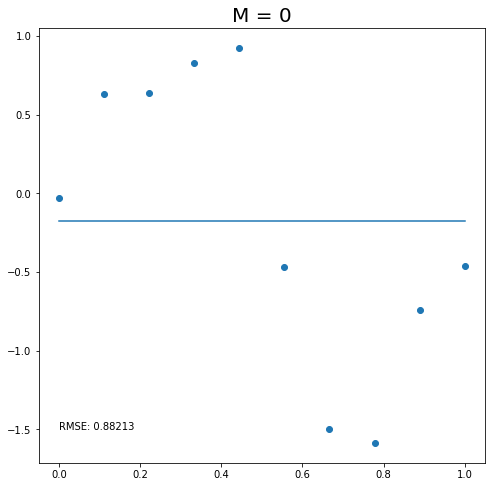

In [22]:
plot_curve(data_x, data_y, rmse_0, w_0)

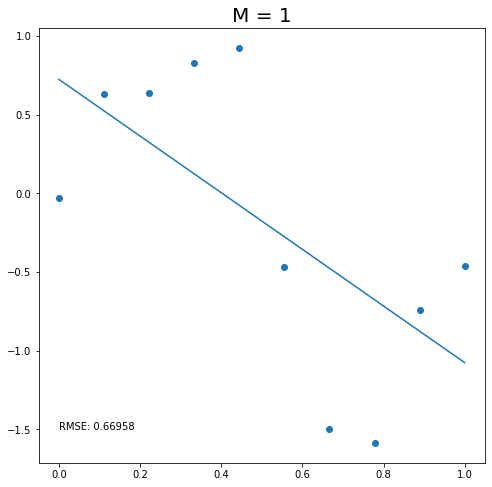

In [23]:
plot_curve(data_x, data_y, rmse_1, w_1)

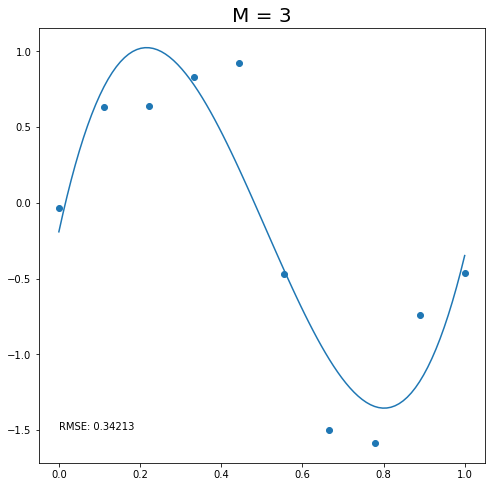

In [24]:
plot_curve(data_x, data_y, rmse_3, w_3)

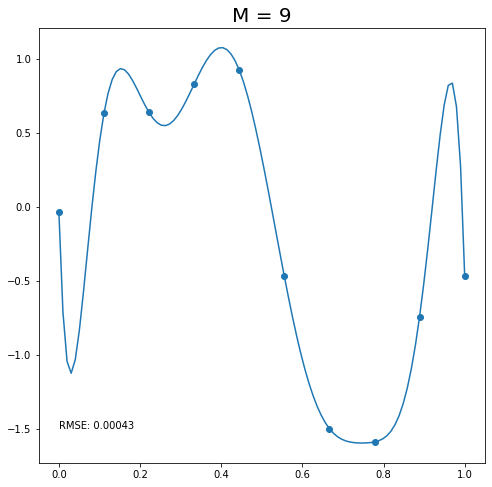

In [25]:
plot_curve(data_x, data_y, rmse_9, w_9)

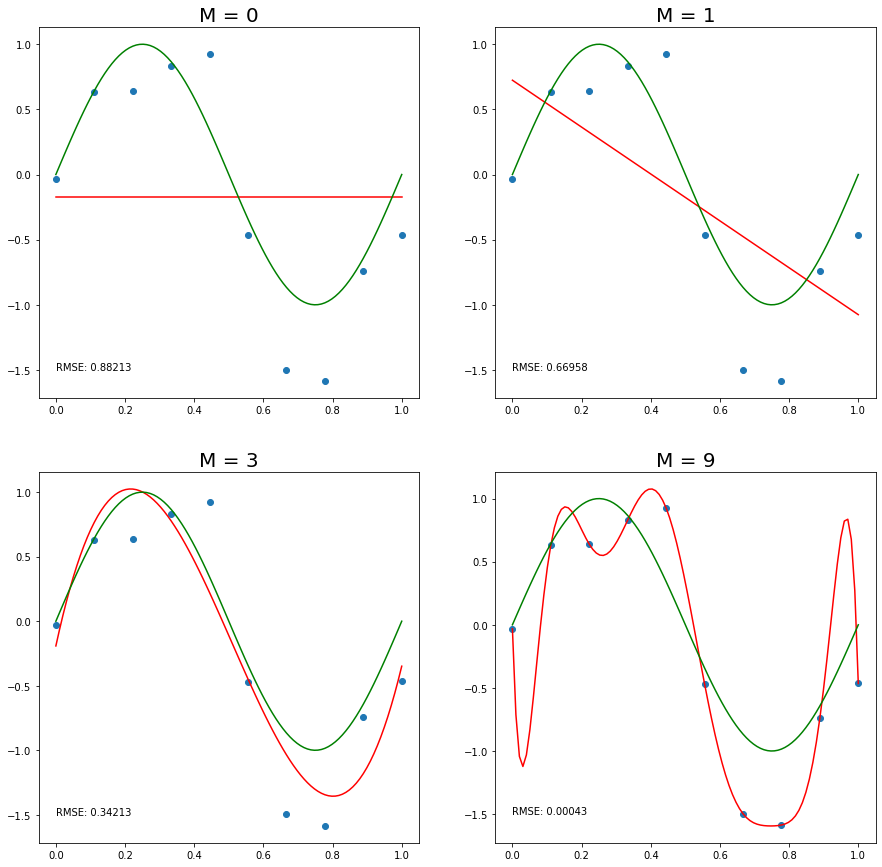

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15,15)) 

# creating first plot
x_axis = np.linspace(0, 1, 100)
y_axis = predict(x_axis, w_0)   
axs[0, 0].plot(x_axis, y_axis, color = 'red')
axs[0, 0].set_title("M = "+str(len(w_0)-1), fontsize = 20)
axs[0, 0].scatter(x, y)
axs[0, 0].plot(xsin, ysin, '-', color = 'green')
axs[0, 0].text(0,-1.5 , "RMSE: " + str(rmse_0))

#creating second plot
x_axis = np.linspace(0, 1, 100)
y_axis = predict(x_axis, w_1)   
axs[0, 1].plot(x_axis, y_axis, color = 'red')
axs[0, 1].set_title("M = "+str(len(w_1)-1), fontsize = 20)
axs[0, 1].scatter(x, y)
axs[0, 1].plot(xsin, ysin, '-', color = 'green')
axs[0, 1].text(0,-1.5 , "RMSE: " + str(rmse_1))

#creating third plot
x_axis = np.linspace(0, 1, 100)
y_axis = predict(x_axis, w_3)   
axs[1, 0].plot(x_axis, y_axis, color = 'red')
axs[1, 0].set_title("M = "+str(len(w_3)-1), fontsize = 20)
axs[1, 0].scatter(x, y)
axs[1, 0].plot(xsin, ysin, '-', color = 'green')
axs[1, 0].text(0,-1.5 , "RMSE: " + str(rmse_3))

#creating fourth plot
x_axis = np.linspace(0, 1, 100)
y_axis = predict(x_axis, w_9)   
axs[1, 1].plot(x_axis, y_axis, color = 'red')
axs[1, 1].set_title("M = "+str(len(w_9)-1), fontsize = 20)
axs[1, 1].scatter(x, y)
axs[1, 1].plot(xsin, ysin, '-', color = 'green')
axs[1, 1].text(0,-1.5 , "RMSE: " + str(rmse_9))
plt.show()

The *generalization* is the ability to categorize correctly new examples that differ from those used for training. In order to measure this property in the model it is common to split the data into two sets: training and test set. The train set is used to obtain $w^\star$ and test set to estimate the performance of the model. In our particular Study Case, the estimation of the model performance is given by the root-mean-square error. The test set error is a measure of how well we are doing in predicting the values of $t$ for new data observations of $x$.

**T6** Make a comparison (plot) of the root-mean-square error in the trainning set and test set with different values of M (from 0 to 9). 

> Try to reproduce Figure 1.5 of the cited book.

In [27]:
data_test = pd.read_csv("data/data_test.csv")
data_test

,x,y
0,0.151515,1.035789
1,0.878788,-0.302710
2,0.232323,1.408419
3,0.353535,1.206799
4,0.787879,-2.100923
5,0.474747,-0.924773
6,0.868687,-1.226440
7,0.797980,-1.308868
8,0.636364,0.153802
9,0.191919,1.063235


In [28]:
data_x_test = np.array(data_test.x)
data_y_test = np.array(data_test.y)

rmse_train = []
rmse_test = []

for i in range(10):
    
    #obtaining the model in the i polynomial and its rmse
    w_i = fit(data_x, data_y, i)
    predicted_i = predict(data_x, w_i)
    rmse_i = rmse(data_y, predicted_i)
    
    #testing the test data in the model and getting the rmse
    predicted_test = predict(data_x_test, w_i)
    rmse_t = rmse(data_y_test, predicted_test)
    rmse_test.append(rmse_t)
    rmse_train.append(rmse_i)
    

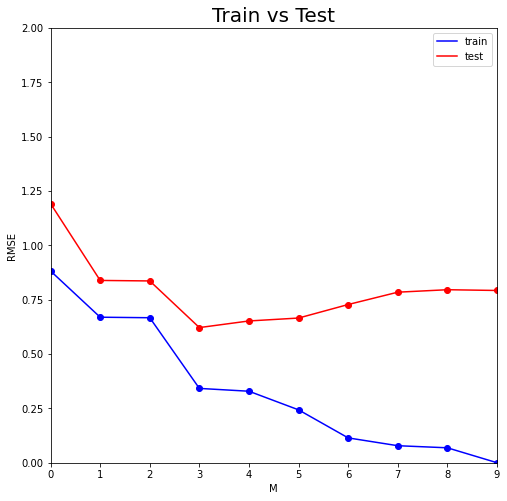

In [29]:
#Plotting train vs test about RMSE refers

x_axis = [i for i in range(10)]

plt.plot(x_axis, rmse_train, color = 'blue', label = 'train')
plt.scatter(x_axis, rmse_train, color = 'blue')
plt.plot(x_axis, rmse_test, color = 'red', label = 'test')
plt.scatter(x_axis, rmse_test, color = 'red')
plt.title("Train vs Test", fontsize = 20)
plt.ylim([0,2])
plt.xlim([0,9])
plt.xlabel("M")
plt.ylabel("RMSE")
plt.legend()
plt.show()

### Identify values of M where the model has an *over-fitting* and *underfitting* behavior.

M is overfitted when is equal to o since in the training set has no error but comparing to the test rmse are so unequal and having a polynomial 9 to predice could be harder since a polynomial of that degree has curves so specific.
M is underfitted when M is equal to 0 because is when is more RMSE in both train and test and in the way that polynomial performs is just a simple horizontal line



## 3. Application

The dataset `auto.csv` includes the characteristics of different cars. The data was retrieved from the UCI Machine Learning Repository ([link](https://archive.ics.uci.edu/ml/datasets/auto+mpg)).


The features in the dataset are:
1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

Let us try to use a Polynomial Curve in order to describe the dependance of the following variables:
* Mileage as function of the Horsepower.
* Mileage as a function of the Displacement.

**T7** Make a scatterplot for each pair of the variables.

In [30]:
data_auto = pd.read_csv("data/Auto.csv")
data_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [31]:
#eliminating values that are ?, possible an error
data_auto.drop(data_auto.loc[data_auto.horsepower == "?"].index, inplace = True)

In [32]:
data_auto.horsepower = data_auto.horsepower.astype(float)

In [33]:
plt.rcParams["figure.figsize"] = (15,8)

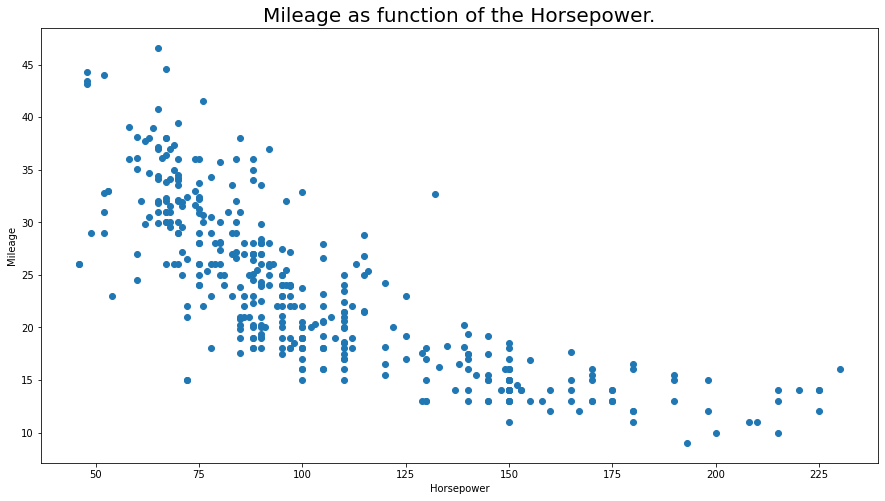

In [34]:
plt.scatter(data_auto.horsepower, data_auto.mpg)
plt.title("Mileage as function of the Horsepower.", fontsize = 20)
plt.xlabel("Horsepower")
plt.ylabel("Mileage")
plt.show()

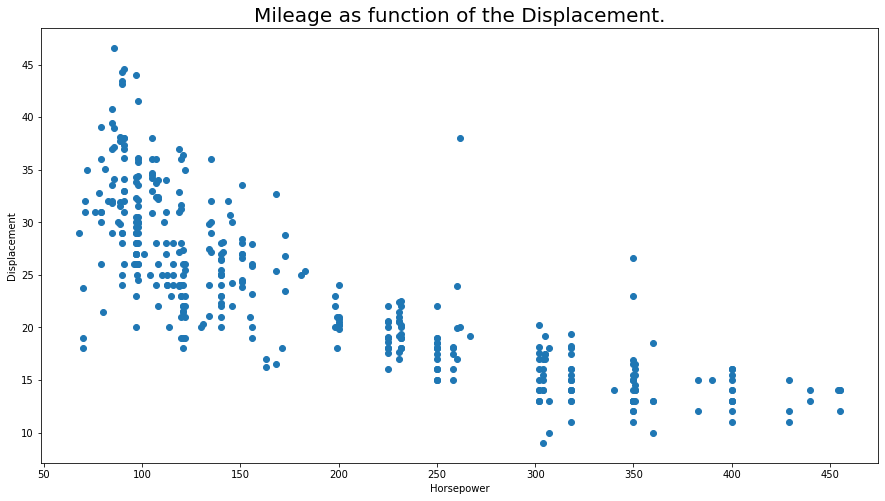

In [35]:
plt.scatter(data_auto.displacement, data_auto.mpg)
plt.title("Mileage as function of the Displacement.", fontsize = 20)
plt.xlabel("Horsepower")
plt.ylabel("Displacement")
plt.show()

**T8** Select randomly 70% as the Training Set and the other 30% as the Test Set. Fit a Polynomial Function. Indicate the best value of M. Don’t forget to include the RMSE.

>You can use the functions ```train_test_split``` from ```sklearn.model_selection```.

## Mileage as function of the Horsepower.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
auto_train, auto_test = train_test_split(data_auto, train_size = .70)

In [38]:
auto_x_test_horsepower = np.array(auto_test.horsepower)
auto_y_test_horsepower = np.array(auto_test.mpg)

auto_x_train_horsepower = np.array(auto_train.horsepower)
auto_y_train_horsepower = np.array(auto_train.mpg)

rmse_train_horsepower = []
rmse_test_horsepower = []

for i in range(10):
    #obtaining the model in the i polynomial and its rmse
    w_i = fit(auto_x_train_horsepower, auto_y_train_horsepower, i)
    predicted_i = predict(auto_x_train_horsepower, w_i)
    rmse_i = rmse(auto_y_train_horsepower, predicted_i)
    
    #testing the test data in the model and getting the rmse
    predicted_test = predict(auto_x_test_horsepower, w_i)
    rmse_t = rmse(auto_y_test_horsepower, predicted_test)
    rmse_test_horsepower.append(rmse_t)
    rmse_train_horsepower.append(rmse_i)
    

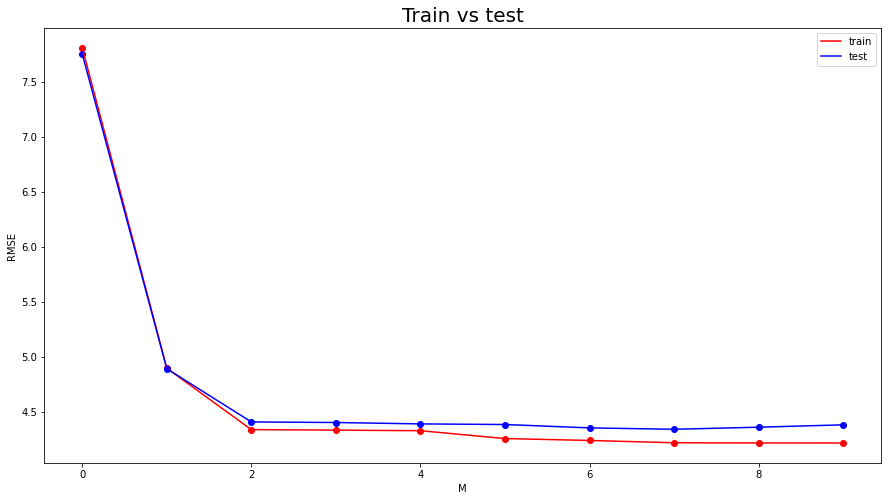

In [39]:
#PLotting Train rmse vs test rmse
x_axis = [i for i in range(10)]

plt.plot(x_axis, rmse_train_horsepower, color = 'red', label = 'train')
plt.scatter(x_axis, rmse_train_horsepower, color = 'red')
plt.plot(x_axis, rmse_test_horsepower, color = 'blue', label = 'test')
plt.scatter(x_axis, rmse_test_horsepower, color = 'blue')
plt.title("Train vs test", fontsize = 20)
plt.xlabel("M")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [40]:
# choosing M  to our model

w_horse = fit(auto_x_train_horsepower, auto_y_train_horsepower, 3)
predicted_horse = predict(auto_x_train_horsepower, w_horse)
rmse_horse = rmse(auto_y_train_horsepower, predicted_horse)

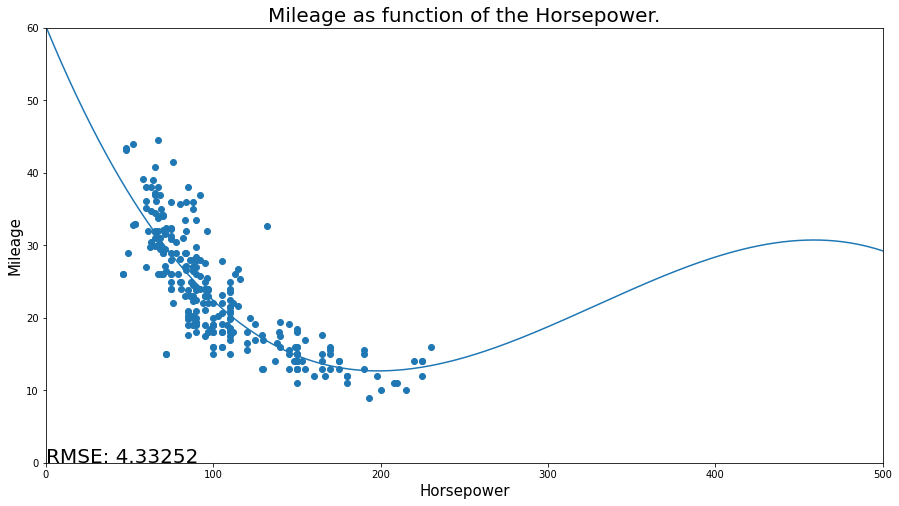

In [41]:
x_axis = np.linspace(0, 500, 1000)

y_axis = predict(x_axis, w_horse)

plt.plot(x_axis, y_axis)
plt.scatter(auto_x_train_horsepower, auto_y_train_horsepower)
plt.text(0,0 , "RMSE: " + str(rmse_horse), fontsize = 20)
plt.title("Mileage as function of the Horsepower.", fontsize = 20)
plt.xlabel("Horsepower", fontsize=15)
plt.ylabel("Mileage", fontsize=15)
plt.xlim([0,500])
plt.ylim([0,60])
plt.show()

##### The best M

For us the best M is 3 since is the one which its behavior keep going down and does not go suddenly to 0 as the ones after 3 do and as 2 that goes up, and that in real world is impossible because the more horsepower, the less mileage per galon you have, therefore, 3 is the best that suit this problem

## Mileage as function of the Displacement.

In [42]:
auto_x_test_disp = np.array(auto_test.displacement)
auto_y_test_disp = np.array(auto_test.mpg)

auto_x_train_disp = np.array(auto_train.displacement)
auto_y_train_disp = np.array(auto_train.mpg)

rmse_train_disp = []
rmse_test_disp = []

for i in range(10):
    #obtaining the model in the i polynomial and its rmse
    w_i = fit(auto_x_train_disp, auto_y_train_disp, i)
    predicted_i = predict(auto_x_train_disp, w_i)
    rmse_i = rmse(auto_y_train_disp, predicted_i)
    
    #testing the test data in the model and getting the rmse
    predicted_test = predict(auto_x_test_disp, w_i)
    rmse_t = rmse(auto_y_test_disp, predicted_test)
    rmse_test_disp.append(rmse_t)
    rmse_train_disp.append(rmse_i)

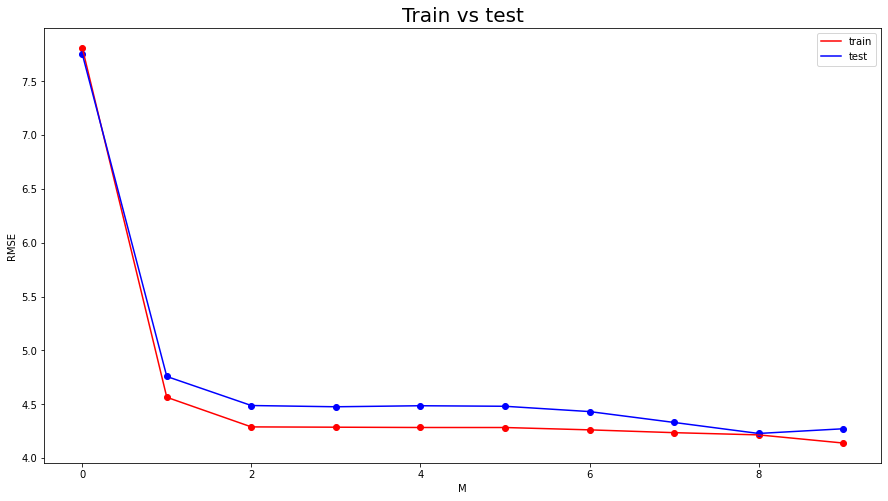

In [43]:
#PLotting Train rmse vs test rmse
x_axis = [i for i in range(10)]

plt.plot(x_axis, rmse_train_disp, color = 'red', label = 'train')
plt.scatter(x_axis, rmse_train_disp, color = 'red')
plt.plot(x_axis, rmse_test_disp, color = 'blue', label = 'test')
plt.scatter(x_axis, rmse_test_disp, color = 'blue')
plt.title("Train vs test", fontsize = 20)
plt.xlabel("M")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [44]:
# choosing M = 2 to our model
w_disp = fit(auto_x_train_disp, auto_y_train_disp, 3)
predicted_disp = predict(auto_x_train_disp, w_disp)
rmse_disp = rmse(auto_y_train_disp, predicted_disp)

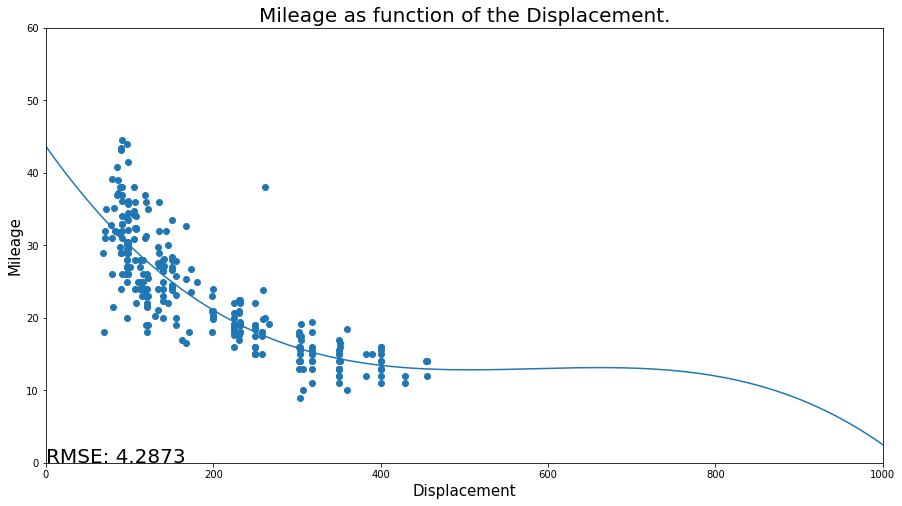

In [45]:
x_axis = np.linspace(0, 1000, 2000)

y_axis = predict(x_axis, w_disp)

plt.plot(x_axis, y_axis)
plt.scatter(auto_x_train_disp, auto_y_train_disp)
plt.text(0,0 , "RMSE: " + str(rmse_disp), fontsize = 20)
plt.title("Mileage as function of the Displacement.", fontsize = 20)
plt.xlabel("Displacement", fontsize=15)
plt.ylabel("Mileage", fontsize=15)
plt.xlim([0,1000])
plt.ylim([0,60])
plt.show()

### The best M

For us the best M is 3 since is the one which its behavior keep going down and does not go suddenly to 0 as the ones after 3 do and  as 2 that goes up

#### Note: The M could if the program runs again to the split of train and test making that some times the signs of the values of the vector w changes making that sometimes 3 goes down and others go up and there are other examples as the latter one.

## Grading Scheme

| Task | Value  |
|------|--------|
| T1   | 12.5 pts |
| T2   | 12.5 pts |
| T3   | 12.5 pts |
| T4   | 12.5 pts |
| T5   | 12.5 pts |
| T6   | 12.5 pts |
| T7   | 12.5 pts |
| T8   | 12.5 pts |
